This tool creates ML models with the given datasets to detect video vs. regular browsing.

In [1]:
import pandas as pd
import csv
import os

In [2]:
import re

def split_number(s):
    return list(filter(None, re.split(r'(\d+)', s)))

Our labels, separated by category.

In [3]:
basic_stats = [
    'up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var', 'up_bytes_skew', 'up_bytes_kurt',
    'up_bytes_perc25', 'up_bytes_perc50', 'up_bytes_perc75', 'up_bytes_perc90',
    'up_packet_mean', 'up_packet_median', 'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
    'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75', 'up_packet_perc90',
    'down_bytes_mean', 'down_bytes_median', 'down_bytes_std', 'down_bytes_var', 'down_bytes_skew', 'down_bytes_kurt',
    'down_bytes_perc25', 'down_bytes_perc50', 'down_bytes_perc75', 'down_bytes_perc90',
    'down_packet_mean', 'down_packet_median', 'down_packet_std', 'down_packet_var', 'down_packet_skew', 'down_packet_kurt',
    'down_packet_perc25', 'down_packet_perc50', 'down_packet_perc75', 'down_packet_perc90']

silences = ['down_bytes_silences', 'down_bytes_silence_mean', 'down_bytes_longest_silence', 'down_bytes_shortest_silence',
           'up_bytes_silences', 'up_bytes_silence_mean', 'up_bytes_longest_silence', 'up_bytes_shortest_silence']


scalogram_1 = ['up_bytes_1max_y', 'up_bytes_1max_x', 'up_bytes_1min_y', 'up_bytes_1min_x',  
    'up_packet_1max_y', 'up_packet_1max_x', 'up_packet_1min_y', 'up_packet_1min_x', 'down_bytes_1max_y',
    'down_bytes_1max_x',    'down_bytes_1min_y', 'down_bytes_1min_x', 'down_packet_1max_y',
    'down_packet_1max_x', 'down_packet_1min_y', 'down_packet_1min_x']

scalogram_2 = ['up_bytes_2max_y', 'up_bytes_2max_x', 'up_bytes_2min_y', 'up_bytes_2min_x',  
    'up_packet_2max_y', 'up_packet_2max_x', 'up_packet_2min_y', 'up_packet_2min_x', 'down_bytes_2max_y',
    'down_bytes_2max_x',    'down_bytes_2min_y', 'down_bytes_2min_x', 'down_packet_2max_y',
    'down_packet_2max_x','down_packet_2min_y','down_packet_2min_x']

scalogram_3 = ['up_bytes_3max_y', 'up_bytes_3max_x', 'up_bytes_3min_y', 'up_bytes_3min_x',  
    'up_packet_3max_y', 'up_packet_3max_x', 'up_packet_3min_y', 'up_packet_3min_x', 'up_packet_3min_y',
    'down_bytes_3max_y', 'down_packet_3min_y', 'down_bytes_3max_x', 'down_bytes_3min_y',
    'down_bytes_3min_x', 'down_packet_3max_y','down_packet_3max_x','down_packet_3min_y','down_packet_3min_x']
scalogram_4 = ['up_bytes_4max_y', 'up_bytes_4max_x', 'up_bytes_4min_y', 'up_bytes_4min_x',  
    'up_packet_4max_y', 'up_packet_4max_x', 'up_packet_4min_y', 'up_packet_4min_x', 'down_bytes_4max_y',
    'down_bytes_4max_x',    'down_bytes_4min_y', 'down_bytes_4min_x', 'down_packet_4max_y',
    'down_packet_4max_x','down_packet_4min_y','down_packet_4min_x']
scalogram_5 = ['up_bytes_5max_y', 'up_bytes_5max_x', 'up_bytes_5min_y', 'up_bytes_5min_x',  
    'up_packet_5max_y', 'up_packet_5max_x', 'up_packet_5min_y', 'up_packet_5min_x', 'down_bytes_5max_y',
    'down_bytes_5max_x',    'down_bytes_5min_y', 'down_bytes_5min_x', 'down_packet_5max_y',
    'down_packet_5max_x','down_packet_5min_y','down_packet_5min_x']

scalogram = scalogram_1 + scalogram_2 + scalogram_3 + scalogram_4 + scalogram_5

Load the dataset.

In [4]:
base_folder = "csv/"
file_name = 'all_30s_1s_32.csv'

dataset = pd.read_csv(os.path.join(str(base_folder), str(file_name)))

dataset = dataset.drop(columns=['Unnamed: 0']).reset_index()
dataset.drop(columns=['index', 'up_packet_silence_mean', 'down_packet_silence_mean',
                      'down_packet_longest_silence', 'down_packet_shortest_silence'] + scalogram, inplace=True)
features = dataset.columns
print(features)
print(len(features))

Index(['up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var',
       'up_bytes_skew', 'up_bytes_kurt', 'up_bytes_perc25', 'up_bytes_perc50',
       'up_bytes_perc75', 'up_bytes_perc90', 'up_bytes_silences',
       'up_bytes_silence_mean', 'up_bytes_longest_silence',
       'up_bytes_shortest_silence', 'up_packet_mean', 'up_packet_median',
       'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
       'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75',
       'up_packet_perc90', 'up_packet_silences', 'up_packet_longest_silence',
       'up_packet_shortest_silence', 'down_bytes_mean', 'down_bytes_median',
       'down_bytes_std', 'down_bytes_var', 'down_bytes_skew',
       'down_bytes_kurt', 'down_bytes_perc25', 'down_bytes_perc50',
       'down_bytes_perc75', 'down_bytes_perc90', 'down_bytes_silences',
       'down_bytes_silence_mean', 'down_bytes_longest_silence',
       'down_bytes_shortest_silence', 'down_packet_mean', 'down_packet_median',
 

Choose the labels to consider.

In [5]:
# Join applications from different capture settings
dataset.loc[dataset['label'] == 'netflix-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-ssh', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'acestream-openvpn', 'label'] = 'acestream'
dataset.loc[dataset['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'browsing-openvpn', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'reddit', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'facebook', 'label'] = 'browsing'

# Video vs. Rest
dataset.loc[dataset['label'] == 'netflix', 'label'] = 'video'
dataset.loc[dataset['label'] == 'youtube', 'label'] = 'video'
dataset.loc[dataset['label'] == 'twitch', 'label'] = 'video'
dataset.loc[dataset['label'] == 'acestream', 'label'] = 'video'

dataset['label'].value_counts()

video       1544
browsing     593
Name: label, dtype: int64

In [6]:
import numpy as np
browsing = dataset[dataset['label'] == 'browsing']
video = dataset[dataset['label'] == 'video']
video

,up_bytes_mean,up_bytes_median,up_bytes_std,up_bytes_var,up_bytes_skew,up_bytes_kurt,up_bytes_perc25,up_bytes_perc50,up_bytes_perc75,up_bytes_perc90,...,down_packet_std,down_packet_var,down_packet_skew,down_packet_kurt,down_packet_perc25,down_packet_perc50,down_packet_perc75,down_packet_perc90,down_packet_silences,label
0,0.027861,-0.019565,0.186711,0.034861,0.285905,-1.599303,-0.167108,-0.019565,0.244423,0.264455,...,4.624994,21.390569,0.509521,-1.380743,-0.379784,2.707917,9.875307,10.112471,4.0,video
1,-0.162757,-0.176617,0.023340,0.000545,1.423366,0.626893,-0.176933,-0.176617,-0.160141,-0.125596,...,0.517726,0.268040,1.552946,0.508083,-0.406009,-0.403728,-0.390616,0.884258,13.0,video
2,-0.161320,-0.175874,0.023916,0.000572,1.444975,1.118546,-0.176754,-0.175874,-0.142113,-0.132510,...,0.504224,0.254242,1.291064,0.053472,-0.405439,-0.398027,0.253035,0.672406,8.0,video
3,-0.164485,-0.176754,0.021271,0.000452,1.747326,1.906428,-0.176933,-0.176754,-0.162708,-0.131781,...,0.459929,0.211535,1.569743,0.911807,-0.406009,-0.403728,-0.128366,0.682440,14.0,video
4,-0.160247,-0.175907,0.023556,0.000555,1.196321,0.103790,-0.176933,-0.175907,-0.148918,-0.127610,...,0.545916,0.298024,1.226227,-0.294391,-0.406009,-0.400308,0.136163,0.825423,12.0,video
5,-0.138304,-0.176148,0.090341,0.008161,3.135842,9.022306,-0.176933,-0.176148,-0.131879,-0.105579,...,2.127249,4.525187,3.659552,13.405973,-0.406009,-0.400308,0.693158,1.066008,10.0,video
6,-0.128165,-0.175182,0.091655,0.008401,2.121594,3.097773,-0.176643,-0.175182,-0.133137,0.018373,...,2.506388,6.281980,2.184646,3.285491,-0.406009,-0.396887,0.691448,4.817771,9.0,video
7,-0.163389,-0.175534,0.021331,0.000455,1.950252,3.363003,-0.176494,-0.175534,-0.156535,-0.137811,...,0.444773,0.197823,1.736024,2.229703,-0.401448,-0.398027,0.079153,0.524862,5.0,video
8,-0.161546,-0.176548,0.023679,0.000561,1.159542,-0.332055,-0.176933,-0.176548,-0.142840,-0.121100,...,0.553097,0.305916,1.163657,-0.484781,-0.406009,-0.401448,0.327719,0.869663,11.0,video
9,-0.166162,-0.176933,0.019996,0.000400,1.557461,1.053593,-0.176933,-0.176933,-0.175862,-0.134432,...,0.448324,0.200994,1.328268,-0.119832,-0.406009,-0.406009,-0.401448,0.619728,17.0,video


Factorize the labels.

In [7]:
prevlabel = dataset['label']
dataset['label'] = pd.factorize(dataset['label'])[0]
labels = dataset['label']
dataset['label'].value_counts()

0    1544
1     593
Name: label, dtype: int64

Check correlation matrix.

In [8]:
dataset.corr()['label'].sort_values(ascending=False)

label                          1.000000
down_bytes_skew                0.403837
down_bytes_kurt                0.386607
down_packet_skew               0.303554
up_packet_skew                 0.279648
down_packet_kurt               0.279524
up_packet_kurt                 0.262443
up_bytes_skew                  0.219486
up_bytes_kurt                  0.189665
down_bytes_shortest_silence    0.070228
up_bytes_shortest_silence      0.065222
up_packet_shortest_silence     0.065222
down_bytes_longest_silence     0.029222
up_packet_longest_silence      0.018584
up_bytes_longest_silence       0.018584
down_bytes_silence_mean       -0.012398
down_packet_var               -0.021246
up_bytes_silence_mean         -0.033293
down_bytes_var                -0.077708
up_bytes_silences             -0.094006
up_packet_silences            -0.094006
up_packet_var                 -0.095604
down_packet_silences          -0.095682
down_bytes_silences           -0.095682
up_bytes_perc25               -0.099000


Imputer for Nan values.

In [9]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(dataset)
dataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)

Normalize features (if needed)

In [10]:
'''
from sklearn.preprocessing import StandardScaler
import numpy as np

dataset_no_label = dataset.loc[:, dataset.columns != 'label']
to_scale = dataset_no_label
scaler = StandardScaler()
scaled = scaler.fit_transform(to_scale)

dataset = pd.DataFrame(scaled)
#joblib.dump(scaler, '../models/std_scaler_' + sampling_interval + '_' + str(sample_size) + '.sav')
'''

"\nfrom sklearn.preprocessing import StandardScaler\nimport numpy as np\n\ndataset_no_label = dataset.loc[:, dataset.columns != 'label']\nto_scale = dataset_no_label\nscaler = StandardScaler()\nscaled = scaler.fit_transform(to_scale)\n\ndataset = pd.DataFrame(scaled)\n#joblib.dump(scaler, '../models/std_scaler_' + sampling_interval + '_' + str(sample_size) + '.sav')\n"

Apply PCA

In [11]:
#PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=45)
main_components = pca.fit_transform(dataset)
dataset = pd.DataFrame(data = main_components)
dataset['label'] = labels


0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2107    0
2108    0
2109    0
2110    0
2111    0
2112    0
2113    0
2114    0
2115    0
2116    0
2117    0
2118    0
2119    0
2120    0
2121    0
2122    0
2123    0
2124    0
2125    0
2126    0
2127    0
2128    0
2129    0
2130    0
2131    0
2132    0
2133    0
2134    0
2135    0
2136    0
Name: label, Length: 2137, dtype: int64

In [12]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(dataset)
dataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)

Split training and testing set randomly.

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

y_train = train['label']
x_train = train.drop(columns=['label'])

y_test = test['label']
x_test = test.drop(columns=['label'])


In [14]:
# Video vs. Video
y_train_video = (y_train == 0)
y_train_browsing = (y_train == 1)

In [15]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score

import matplotlib.pyplot as plt

def do_test_forest(model):
    
    y_probas_video = cross_val_predict(model, x_train, y_train_video, cv=10, method="predict_proba")
    y_probas_browsing = cross_val_predict(model, x_train, y_train_browsing, cv=10, method="predict_proba")
    y_scores_video = y_probas_video[:, 1]
    y_scores_browsing = y_probas_browsing[:, 1]
    
    fpr_v, tpr_v, thresholds_y = roc_curve(y_train_video, y_scores_video)
    fpr_b, tpr_b, thresholds_n = roc_curve(y_train_browsing, y_scores_browsing)
    plot_roc_curve(fpr_v, tpr_v, "Video")
    plot_roc_curve(fpr_b, tpr_b, "Browsing")

    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))    
  
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [17]:
from sklearn.decomposition import PCA

def do_test_svm(model):    
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))    
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [18]:
def do_test_forest_ovo(model):

    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))    
  
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

-----Random Forest------
	CrossValScore: 0.9818673050615596
[[309   0]
 [  5 114]]

Accuracy train set: 0.9988297249853716
Accuracy test set: 0.9883177570093458
-----OvO Classifier Random Forest------
	CrossValScore: 0.7624905800753594
[[221  88]
 [  0 119]]

Accuracy train set: 0.8940901111761264
Accuracy test set: 0.794392523364486
-----OvR Classifier Random Forest------
	CrossValScore: 0.7624905800753594
[[221  88]
 [  0 119]]

Accuracy train set: 0.8940901111761264
Accuracy test set: 0.794392523364486
----------SVM-----------
	CrossValScore: 0.8905817953456374
[[300   9]
 [ 28  91]]

Accuracy train set: 0.9643066120538326
Accuracy test set: 0.9135514018691588


'\n\nprint("--------AdaBoost Random Forest--------")\n\nrf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion=\'entropy\', max_depth=9,\n                            max_features=\'log2\', max_leaf_nodes=None, min_impurity_decrease=0.0,\n                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,\n                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,\n                            random_state=42, verbose=0, warm_start=False)\n\nada_clf = AdaBoostClassifier(\n    rf,\n    algorithm="SAMME.R", learning_rate=0.5\n)\ndo_test_forest(ada_clf)\n\nprint("---------Decision Tree------")\ndt = DecisionTreeClassifier(random_state=42)\n\ndo_test_forest(dt)\n\nprint("--------AdaBoost Decision Tree--------")\n\ndt = DecisionTreeClassifier(random_state=42)\n\nada_clf = AdaBoostClassifier(\n    dt,\n    algorithm="SAMME.R", learning_rate=0.5\n)\ndo_test_forest(ada_clf)\n'

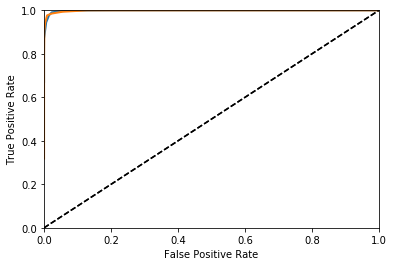

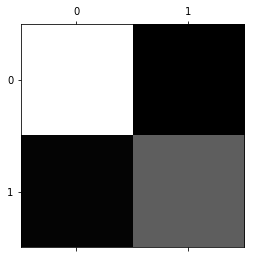

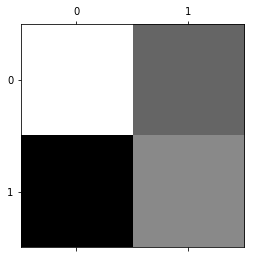

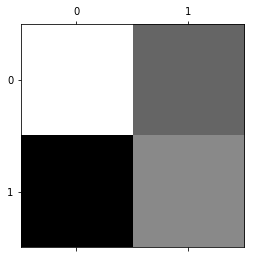

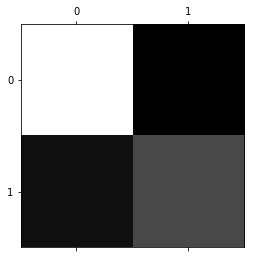

In [19]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

print("-----Random Forest------")
rf = RandomForestClassifier(random_state=13)

do_test_forest(rf)

print("-----OvO Classifier Random Forest------")

rf = OneVsOneClassifier(rf)
do_test_forest_ovo(rf)

print("-----OvR Classifier Random Forest------")

rf = OneVsRestClassifier(rf)
do_test_forest_ovo(rf)

print("----------SVM-----------")
svm = SVC(random_state=42, probability=True)
do_test_svm(svm)

'''

print("--------AdaBoost Random Forest--------")

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9,
                            max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,
                            random_state=42, verbose=0, warm_start=False)

ada_clf = AdaBoostClassifier(
    rf,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)

print("---------Decision Tree------")
dt = DecisionTreeClassifier(random_state=42)

do_test_forest(dt)

print("--------AdaBoost Decision Tree--------")

dt = DecisionTreeClassifier(random_state=42)

ada_clf = AdaBoostClassifier(
    dt,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)
'''